**Actividad 6 Solucion de problemas** - Alan Rodolfo Guerra Lopez 1923358 N1

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Cargar el conjunto de datos
def load_data():
    california = fetch_california_housing()
    df = pd.DataFrame(data=california.data, columns=california.feature_names)
    df['Precio'] = california.target
    return df

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
def split_data(df):
    X = df[['MedInc']]  # Ingreso medio
    y = df['Precio']    # Precio de la casa
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Entrenar el modelo de regresión lineal
def train_model(X_train, y_train):
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    return modelo

In [7]:
# Evaluar el modelo
def evaluate_model(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

In [8]:
# Graficar los resultados
def plot_results(X_test, y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos Reales', alpha=0.5)
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Modelo de Regresión Lineal')
    plt.title('Regresión Lineal: Predicción del Precio de la Casa')
    plt.xlabel('Ingreso Medio (MedInc)')
    plt.ylabel('Precio de la Casa')
    plt.grid()
    plt.legend()
    plt.show()

Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128
Error Cuadrático Medio: 0.71
R²: 0.46


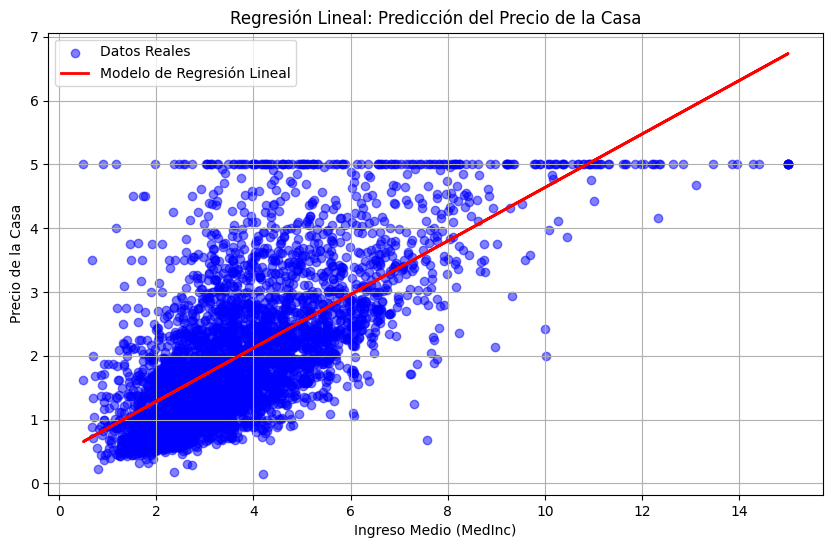

In [9]:
if __name__ == "__main__":
    # Cargar los datos
    df = load_data()

    # Dividir los datos
    X_train, X_test, y_train, y_test = split_data(df)

    # Mostrar el tamaño de los conjuntos
    print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
    print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')

    # Entrenar el modelo
    modelo = train_model(X_train, y_train)

    # Evaluar el modelo
    mse, r2, y_pred = evaluate_model(modelo, X_test, y_test)

    # Mostrar resultados de evaluación
    print(f'Error Cuadrático Medio: {mse:.2f}')
    print(f'R²: {r2:.2f}')

    # Graficar los resultados
    plot_results(X_test, y_test, y_pred)